In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.io import arff
from google.colab import files
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
 
from matplotlib import pyplot as plt
# deals with noisy data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_set=pd.read_csv('/content/UNSW_NB15_testing-set.csv',header=None)
train_set=pd.read_csv('/content/UNSW_NB15_training-set unlabd - UNSW_NB15_training-set.csv',header=None)

train_set.dropna(inplace=True,axis=1)#drop na's

# The CSV file has no column heads, so add them
train_set.columns = [
    'dur',
    'proto',
    'service',
    'state',
    'spkts',
    'dpkts',
    'sbytes',
    'dbytes',
    'rate',
    'sttl',
    'dttl',
    'sload',
    'dload',
    'sloss',
    'dloss',
    'sinpkt',
    'dinpkt',
    'sjit','djit','swin','stcpb','dtcpb','dwin','tcprtt','synack',
    'ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src',
    'ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login',
    'ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports',
    'attack_cat',
    'label'
]

test_set.columns = [
    'dur',
    'proto',
    'service',
    'state',
    'spkts',
    'dpkts',
    'sbytes',
    'dbytes',
    'rate',
    'sttl',
    'dttl',
    'sload',
    'dload',
    'sloss',
    'dloss',
    'sinpkt',
    'dinpkt',
    'sjit','djit','swin','stcpb','dtcpb','dwin','tcprtt','synack',
    'ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src',
    'ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login',
    'ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports',
    'attack_cat',
    'label'
]


train_set

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
print('Train data shape', train_set.shape)
print('Test data shape', test_set.shape)

Train data shape (82332, 44)
Test data shape (175341, 44)


In [ ]:
 #state
 map = {'ACC':1,'CLO':2,'CON':3,'FIN':4,'INT':5,'REQ':6,'RST':7,'ECO':8,'no':9,'PAR':10,'URN':11}
 #service
 map2 ={'http':1,'ftp':2,'ftp-data':3,'smtp':4,'pop3':5,'dns':6,'snmp':7,'ssl':8,'dhcp':9,'irc':10,'radius':11,'ssh':12}
 #protocol
 map3 = {'udp': 1, 'arp': 2, 'tcp': 3, 'igmp': 4, 'ospf': 5, 'sctp': 6, 'gre': 7, 'ggp': 8, 'ip': 9, 'ipnip': 10, 'st2': 11, 'argus': 12, 'chaos': 13, 'egp': 14, 'emcon': 15, 'nvp': 16, 'pup': 17, 'xnet': 18, 'mux': 19, 'dcn': 20, 'hmp': 21, 'prm': 22, 'trunk-1': 23, 'trunk-2': 24, 'xns-idp': 25, 'leaf-1': 26, 'leaf-2': 27, 'irtp': 28, 'rdp': 29, 'netblt': 30, 'mfe-nsp': 31, 'merit-inp': 32, '3pc': 33, 'idpr': 34, 'ddp': 35, 'idpr-cmtp': 36, 'tp++': 37, 'ipv6': 38, 'sdrp': 39, 'ipv6-frag': 40, 'ipv6-route': 41, 'idrp': 42, 'mhrp': 43, 'i-nlsp': 44, 'rvd': 45, 'mobile': 46, 'narp': 47, 'skip': 48, 'tlsp': 49, 'ipv6-no': 50, 'any': 51, 'ipv6-opts': 52, 'cftp': 53, 'sat-expak': 54, 'ippc': 55, 'kryptolan': 56, 'sat-mon': 57, 'cpnx': 58, 'wsn': 59, 'pvp': 60, 'br-sat-mon': 61, 'sun-nd': 62, 'wb-mon': 63, 'vmtp': 64, 'ttp': 65, 'vines': 66, 'nsfnet-igp': 67, 'dgp': 68, 'eigrp': 69, 'tcf': 70, 'sprite-rpc': 71, 'larp': 72, 'mtp': 73, 'ax.25': 74, 'ipip': 75, 'aes-sp3-d': 76, 'micp': 77, 'encap': 78, 'pri-enc': 79, 'gmtp': 80, 'ifmp': 81, 'pnni': 82, 'qnx': 83, 'scps': 84, 'cbt': 85, 'bbn-rcc': 86, 'igp': 87, 'bna': 88, 'swipe': 89, 'visa': 90, 'ipcv': 91, 'cphb': 92, 'iso-tp4': 93, 'wb-expak': 94, 'sep': 95, 'secure-vmtp': 96, 'xtp': 97, 'il': 98, 'rsvp': 99, 'unas': 100, 'fc': 101, 'iso-ip': 102, 'etherip': 103, 'pim': 104, 'aris': 105, 'a/n': 106, 'ipcomp': 107, 'snp': 108, 'compaq-peer': 109, 'ipx-n-ip': 110, 'pgm': 111, 'vrrp': 112, 'l2tp': 113, 'zero': 114, 'ddx': 115, 'iatp': 116, 'stp': 117, 'srp': 118, 'uti': 119, 'sm': 120, 'smp': 121, 'isis': 122, 'ptp': 123, 'fire': 124, 'crtp': 125, 'crudp': 126, 'sccopmce': 127, 'iplt': 128, 'pipe': 129, 'sps': 130,'ib':131,'icmp':132,'rtp':133}
 #attack_cat
 map4={'Normal': 1, 'Reconnaissance': 2, 'Backdoor': 3, 'DoS': 4, 'Exploits': 5, 'Analysis': 6, 'Fuzzers': 7, 'Worms': 8, 'Shellcode': 9, 'Generic': 10}

 df=pd.DataFrame(train_set) 
 df=df.replace({'-':np.nan})
 df=df.replace(map3)
 df=df.replace(map)
 df=df.replace(map2)
 df=df.replace(map4)

 train_set=df
 train_set.dropna(inplace=True,axis=0)


In [ ]:
df=pd.DataFrame(test_set)
df=df.replace(map3)
df=df.replace(map)
df=df.replace(map2)
df=df.replace(map4)
df=df.replace({'-':np.nan})
test_set=df
test_set.dropna(inplace=True,axis=0)

In [ ]:
test_set

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,3,2.0,4,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,1,0
11,2.093085,3,4.0,4,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,1,0
15,0.000002,1,7.0,5,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,1,0
17,0.393556,3,1.0,4,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,1,0
21,0.338017,3,1.0,4,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000006,1,6.0,5,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,10,1
175336,0.000009,1,6.0,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,10,1
175338,0.000009,1,6.0,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,10,1
175339,0.000009,1,6.0,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,10,1


In [ ]:
train_set

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,0.983874,3,1.0,4,10,8,816,1172,17.278635,62,252,5976.375000,8342.531250,2,2,109.319333,124.932859,5929.211713,192.590406,255,794167371,1624757001,255,0.206572,0.108393,0.098179,82,147,1,184,2,1,1,1,1,2,0,0,1,1,3,0,1,0
40,1.535254,3,1.0,4,10,10,826,1266,12.375802,62,252,3876.882812,5940.385254,2,2,170.481889,159.070562,11933.065600,244.118016,255,708428911,3141441573,255,0.180318,0.103612,0.076706,83,127,1,187,2,1,1,1,1,2,0,0,1,1,3,0,1,0
45,1.059359,3,1.0,4,10,8,830,1134,16.047441,62,252,5641.147461,7498.874512,2,2,117.706556,132.899281,6102.668305,255.756219,255,1853677305,1202418679,255,0.274887,0.128459,0.146428,83,142,1,165,1,1,1,1,1,1,0,0,1,3,1,0,1,0
49,0.990548,3,1.0,4,10,10,804,1414,19.181301,62,252,5847.268066,10281.177730,2,2,110.060889,100.616555,7172.956819,143.497953,255,1528762476,1066585482,255,0.181441,0.084249,0.097192,80,141,1,261,2,1,18,1,1,2,0,0,1,1,2,0,1,0
72,1.303518,3,1.0,4,12,8,898,1120,14.575939,62,252,5057.083984,6014.492676,2,2,118.501635,175.467000,6491.561713,252.408328,255,1182907296,802589817,255,0.140062,0.074510,0.065552,75,140,1,157,1,1,1,1,1,1,0,0,1,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,0.818276,3,1.0,4,60,14,68199,612,89.211954,254,252,655651.625000,5562.915039,27,1,13.441272,56.755152,1376.971154,76.224305,255,3137145926,3197614932,255,0.154745,0.080450,0.074295,1137,44,1,0,1,1,1,1,1,2,0,0,1,1,1,0,1,0
81466,0.825170,3,1.0,4,60,14,68199,612,88.466621,254,252,650173.937500,5516.438965,27,1,13.969984,57.166383,1389.032442,82.519703,255,3567303131,4168480199,255,0.113208,0.081998,0.031210,1137,44,1,0,1,1,45,1,1,1,0,0,1,1,1,0,1,0
81518,0.874942,3,1.0,4,60,14,68199,612,83.434101,254,252,613188.062500,5202.630371,27,1,14.591627,63.407922,1526.290325,97.276484,255,1516200001,1237225352,255,0.104980,0.050635,0.054345,1137,44,1,0,2,1,23,1,1,2,0,0,1,1,2,0,1,0
81540,0.740231,3,1.0,4,60,14,68199,612,98.617867,254,252,724779.187500,6149.432129,27,1,12.379305,53.710461,1300.964841,83.333812,255,860363568,341738851,255,0.082721,0.041986,0.040735,1137,44,1,0,3,1,25,1,1,3,0,0,1,1,3,0,1,0


In [ ]:
target = train_set['label']
test_target = test_set['label']
train_set.drop(['label'], axis=1, inplace=True)
test_set.drop(['label'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set)
train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

pd.DataFrame(train_set)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.151353,1.24742,-1.542786,-0.661729,-0.044028,-0.056242,-0.047047,-0.063537,-0.654855,-1.100636,1.574395,-0.636446,-0.198251,-0.040186,-0.057365,0.277381,0.264238,0.110464,-0.104008,1.24742,-0.037970,0.610211,1.247494,2.615963,2.600448,2.425055,-0.189706,0.156284,0.964793,-0.060792,-0.781556,-0.419808,-0.748617,-0.677431,-0.700427,-0.666208,-0.139772,-0.139398,0.739098,-0.778396,-0.707906,0.0,-1.397995
1,0.357155,1.24742,-1.542786,-0.661729,-0.044028,-0.041793,-0.047000,-0.063025,-0.654886,-1.100636,1.574395,-0.636474,-0.201151,-0.040186,-0.057365,0.511358,0.370806,0.328417,-0.091637,1.24742,-0.103611,1.780580,1.247494,2.214319,2.463614,1.775245,-0.184717,0.072003,0.964793,-0.060740,-0.781556,-0.419808,-0.748617,-0.677431,-0.700427,-0.666208,-0.139772,-0.139398,0.739098,-0.778396,-0.707906,0.0,-1.397995
2,0.179528,1.24742,-1.542786,-0.661729,-0.044028,-0.056242,-0.046981,-0.063744,-0.654863,-1.100636,1.574395,-0.636451,-0.199270,-0.040186,-0.057365,0.309466,0.289107,0.116761,-0.088843,1.24742,0.773180,0.284308,1.247494,3.661071,3.174745,3.885153,-0.184717,0.135214,0.964793,-0.061119,-0.850215,-0.419808,-0.748617,-0.677431,-0.700427,-0.732642,-0.139772,-0.139398,0.739098,-0.601013,-0.845030,0.0,-1.397995
3,0.153844,1.24742,-1.542786,-0.661729,-0.044028,-0.041793,-0.047103,-0.062219,-0.654843,-1.100636,1.574395,-0.636448,-0.195911,-0.040186,-0.057365,0.280217,0.188330,0.155615,-0.115795,1.24742,0.524429,0.179491,1.247494,2.231499,1.909437,2.395187,-0.199683,0.131000,0.964793,-0.059467,-0.781556,-0.419808,0.755455,-0.677431,-0.700427,-0.666208,-0.139772,-0.139398,0.739098,-0.778396,-0.776468,0.0,-1.397995
4,0.270660,1.24742,-1.542786,-0.661729,-0.031872,-0.056242,-0.046665,-0.063820,-0.654872,-1.100636,1.574395,-0.636458,-0.201062,-0.040186,-0.057365,0.312508,0.421990,0.130879,-0.089647,1.24742,0.259645,-0.024224,1.247494,1.598467,1.630703,1.437706,-0.224628,0.126786,0.964793,-0.061256,-0.850215,-0.419808,-0.748617,-0.677431,-0.700427,-0.732642,-0.139772,-0.139398,0.739098,-0.689704,-0.845030,0.0,-1.397995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35174,0.089544,1.24742,-1.542786,-0.661729,0.259855,-0.012895,0.266900,-0.066586,-0.654406,0.790668,1.574395,-0.627894,-0.201607,0.270161,-0.072148,-0.089401,0.051408,-0.054791,-0.131947,1.24742,1.755792,1.823926,1.247494,1.823093,1.800708,1.702284,5.073630,-0.277761,0.964793,-0.063957,-0.850215,-0.419808,-0.748617,-0.677431,-0.700427,-0.666208,-0.139772,-0.139398,0.739098,-0.778396,-0.845030,0.0,-1.397995
35175,0.092117,1.24742,-1.542786,-0.661729,0.259855,-0.012895,0.266900,-0.066586,-0.654411,0.790668,1.574395,-0.627966,-0.201663,0.270161,-0.072148,-0.087379,0.052692,-0.054354,-0.130436,1.24742,2.085116,2.573107,1.247494,1.187645,1.845013,0.398458,5.073630,-0.277761,0.964793,-0.063957,-0.850215,-0.419808,3.144275,-0.677431,-0.700427,-0.732642,-0.139772,-0.139398,0.739098,-0.778396,-0.845030,0.0,-1.397995
35176,0.110694,1.24742,-1.542786,-0.661729,0.259855,-0.012895,0.266900,-0.066586,-0.654443,0.790668,1.574395,-0.628453,-0.202042,0.270161,-0.072148,-0.085001,0.072176,-0.049371,-0.126893,1.24742,0.514811,0.311167,1.247494,1.061769,0.947391,1.098563,5.073630,-0.277761,0.964793,-0.063957,-0.781556,-0.419808,1.197829,-0.677431,-0.700427,-0.666208,-0.139772,-0.139398,0.739098,-0.778396,-0.776468,0.0,-1.397995
35177,0.060414,1.24742,-1.542786,-0.661729,0.259855,-0.012895,0.266900,-0.066586,-0.654348,0.790668,1.574395,-0.626984,-0.200899,0.270161,-0.072148,-0.093464,0.041903,-0.057551,-0.130240,1.24742,0.012709,-0.379846,1.247494,0.721243,0.699854,0.686701,5.073630,-0.277761,0.964793,-0.063957,-0.712897,-0.419808,1.374779,-0.677431,-0.700427,-0.599775,-0.139772,-0.139398,0.739098,-0.778396,-0.707906,0.0,-1.397995


Stack Denoising AutoEncoder

In [ ]:
#adding noise to the dataset
clean_data = train_set
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [35179, 43]) 
print(noise[0:5]) 


[[ 0.02227374 -0.09650794  0.08865597  0.00100476 -0.14126429 -0.11977706
  -0.08799868  0.15565467  0.08165491  0.09541594  0.00919351 -0.09840369
  -0.08549394  0.13859928 -0.03774969 -0.10975031  0.09520859 -0.05637454
  -0.06296296  0.11643525  0.20597901 -0.08219732 -0.00097215  0.02498315
   0.05804189  0.12318889  0.14612677  0.2035794  -0.01817471 -0.02005555
  -0.07675098 -0.10165614  0.07690672  0.18649307 -0.00038652  0.24909234
  -0.07422285 -0.05399424 -0.06615572  0.0107121  -0.00904665  0.19550854
   0.18213397]
 [ 0.02414136 -0.10687439  0.06459852  0.08577446  0.10763503  0.02457933
  -0.04462715 -0.0008942  -0.06450239  0.10035801  0.13794466  0.09188828
   0.03601762  0.09111426 -0.01980558  0.02604152  0.05311289 -0.07902922
  -0.03820647 -0.03535826  0.13235823  0.08729415 -0.06152169  0.08139311
  -0.08173237  0.07902337 -0.01878903 -0.01439577  0.05409947  0.05865003
  -0.20224639 -0.01577557  0.00416471  0.20618926  0.04241526  0.03512759
   0.23946829 -0.126617

In [ ]:
noisy_data = clean_data + noise
print(noisy_data[0:5])
print('train data shape', noisy_data.shape)

[[ 1.73626744e-01  1.15091183e+00 -1.45413033e+00 -6.60724633e-01
  -1.85291847e-01 -1.76018716e-01 -1.35045311e-01  9.21176903e-02
  -5.73200083e-01 -1.00521960e+00  1.58358819e+00 -7.34850075e-01
  -2.83745389e-01  9.84136682e-02 -9.51143606e-02  1.67630319e-01
   3.59446598e-01  5.40898554e-02 -1.66971355e-01  1.36385502e+00
   1.68008519e-01  5.28013778e-01  1.24652207e+00  2.64094573e+00
   2.65848970e+00  2.54824399e+00 -4.35787395e-02  3.59863345e-01
   9.46618617e-01 -8.08472797e-02 -8.58306725e-01 -5.21464266e-01
  -6.71710133e-01 -4.90938287e-01 -7.00813739e-01 -4.17116068e-01
  -2.13994601e-01 -1.93392470e-01  6.72942401e-01 -7.67683707e-01
  -7.16952647e-01  1.95508543e-01 -1.21586063e+00]
 [ 3.81295885e-01  1.14054539e+00 -1.47818778e+00 -5.75954930e-01
   6.36074818e-02 -1.72135732e-02 -9.16271818e-02 -6.39193806e-02
  -7.19387948e-01 -1.00027753e+00  1.71233934e+00 -5.44585744e-01
  -1.65133583e-01  5.09286453e-02 -7.71702509e-02  5.37399779e-01
   4.23918450e-01  2.4938

In [ ]:
pd.DataFrame(noisy_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.173627,1.150912,-1.454130,-0.660725,-0.185292,-0.176019,-0.135045,0.092118,-0.573200,-1.005220,1.583588,-0.734850,-0.283745,0.098414,-0.095114,0.167630,0.359447,0.054090,-0.166971,1.363855,0.168009,0.528014,1.246522,2.640946,2.658490,2.548244,-0.043579,0.359863,0.946619,-0.080847,-0.858307,-0.521464,-0.671710,-0.490938,-0.700814,-0.417116,-0.213995,-0.193392,0.672942,-0.767684,-0.716953,0.195509,-1.215861
1,0.381296,1.140545,-1.478188,-0.575955,0.063607,-0.017214,-0.091627,-0.063919,-0.719388,-1.000278,1.712339,-0.544586,-0.165134,0.050929,-0.077170,0.537400,0.423918,0.249388,-0.129843,1.212062,0.028747,1.867874,1.185973,2.295712,2.381881,1.854269,-0.203506,0.057608,1.018893,-0.002090,-0.983802,-0.435584,-0.744452,-0.471242,-0.658012,-0.631081,0.099697,-0.266016,0.565153,-0.589819,-0.557924,0.080460,-1.464871
2,0.151594,1.244251,-1.556291,-0.830951,-0.089325,-0.177248,-0.053998,-0.204243,-0.622000,-1.003544,1.357310,-0.507811,-0.267326,-0.044066,-0.146226,0.134450,0.299693,0.156638,-0.092616,1.224284,0.716538,0.232780,1.226692,3.926469,2.928492,3.914344,-0.298145,0.111183,0.865009,-0.006983,-0.857776,-0.421113,-0.853794,-0.649794,-0.640518,-0.712198,-0.082631,-0.162527,0.798086,-0.512145,-0.787174,0.065707,-1.247319
3,0.125454,1.182997,-1.469734,-0.545467,-0.009185,-0.157394,-0.066550,-0.039005,-0.614060,-0.927186,1.346483,-0.644407,-0.312762,0.140781,-0.028458,0.198549,0.222686,0.203511,-0.099428,1.294365,0.633449,0.136114,1.160112,2.411310,1.828354,2.453385,-0.394469,-0.077598,1.037844,0.021330,-0.705960,-0.318778,0.614013,-0.767347,-0.745009,-0.769177,-0.156889,0.100762,0.686264,-0.664773,-0.900546,0.028728,-1.347482
4,0.356846,1.414809,-1.677292,-0.619101,-0.105571,-0.018369,-0.079342,-0.012540,-0.716905,-1.277333,1.519788,-0.788787,-0.235239,-0.109287,0.047486,0.235103,0.224568,0.082396,-0.100815,1.344251,0.131227,0.056281,1.306126,1.564744,1.483776,1.420687,-0.283996,0.242289,1.014924,0.010135,-0.868272,-0.421803,-0.720436,-0.803935,-0.785427,-0.751662,-0.074351,-0.019995,0.726642,-0.678766,-0.730775,-0.023942,-1.455065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35174,0.017929,1.319744,-1.608476,-0.619370,0.209803,-0.196136,0.355483,-0.012165,-0.764195,0.859819,1.528628,-0.693354,-0.360570,0.269226,0.072104,-0.159561,-0.074716,-0.120540,-0.042809,1.151226,1.660335,1.782976,1.128028,1.905594,1.864656,1.739282,4.947256,-0.527839,1.065526,-0.048528,-0.933409,-0.406975,-0.763816,-0.634084,-0.794927,-0.784042,-0.155989,-0.088236,0.551487,-0.657955,-0.773891,-0.048193,-1.121363
35175,0.040077,1.177525,-1.726951,-0.420418,0.420083,-0.101113,0.125525,-0.228242,-0.692506,0.868363,1.545624,-0.637224,-0.209334,0.420957,0.096095,-0.026263,-0.047512,0.025282,-0.127282,1.275202,2.087836,2.419988,1.200354,1.127547,1.778663,0.541340,5.122961,-0.180838,0.803775,-0.184128,-0.998823,-0.432571,3.310204,-0.649564,-0.485578,-0.712972,-0.250965,-0.006791,0.653111,-0.910367,-0.741154,-0.186487,-1.459163
35176,0.072567,1.340949,-1.533660,-0.646886,0.407923,-0.103432,0.053533,-0.050380,-0.643551,0.894784,1.567621,-0.651709,-0.222123,0.343416,-0.133654,-0.151901,0.065667,-0.063710,-0.041844,1.355163,0.451233,0.274137,1.319259,1.034943,0.899299,1.088605,5.129893,-0.286425,0.806361,-0.261352,-0.657931,-0.520478,1.128402,-0.662690,-0.665527,-0.712544,-0.084705,-0.297815,0.669996,-0.692424,-0.700585,0.111086,-1.334219
35177,0.023964,1.276408,-1.611763,-0.673577,0.233835,-0.023621,0.182567,-0.008513,-0.570104,0.888748,1.703484,-0.560225,-0.391468,0.327095,-0.068130,-0.031935,0.000357,0.060987,-0.091377,1.138361,-0.025388,-0.534767,1.275912,0.628091,0.716821,0.714492,4.845092,-0.196292,1.115170,-0.076187,-0.596521,-0.500115,1.591739,-0.778586,-0.748680,-0.612847,-0.200624,-0.148320,0.832175,-0.811338,

Denoising AutoEncoder 1

In [ ]:
input_dim = noisy_data.shape[1]

feature_dim = [35, 30, 25, 20]
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 43)]              0         
_________________________________________________________________
dense (Dense)                (None, 35)                1540      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                780   

In [ ]:
history = autoencoder.fit(noisy_data,train_set,epochs=50 ,shuffle = False).history

Epoch 1/50
1100/1100 [==============================] - 2s 1ms/step - loss: 0.9767
Epoch 2/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 3/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 4/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 5/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 6/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 7/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 8/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 9/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 10/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9767
Epoch 11/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9768
Epoch 12/50
1100/1100 [==============================] - 1s 1ms/step - loss: 0.9768
E

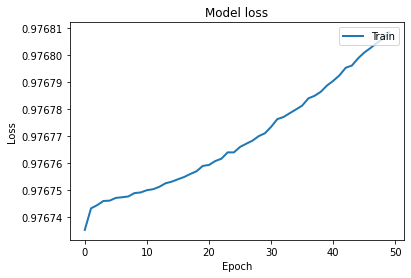

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=autoencoder.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=autoencoder.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=autoencoder.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=autoencoder.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

DAE 2

In [ ]:
clean_data1 = featuremodel.predict(train_set)
mu, sigma = 0, 0.1 
noise1 = np.random.normal(mu, sigma, [35179, 20]) 
print(noise[0:5]) 

[[ 0.02227374 -0.09650794  0.08865597  0.00100476 -0.14126429 -0.11977706
  -0.08799868  0.15565467  0.08165491  0.09541594  0.00919351 -0.09840369
  -0.08549394  0.13859928 -0.03774969 -0.10975031  0.09520859 -0.05637454
  -0.06296296  0.11643525  0.20597901 -0.08219732 -0.00097215  0.02498315
   0.05804189  0.12318889  0.14612677  0.2035794  -0.01817471 -0.02005555
  -0.07675098 -0.10165614  0.07690672  0.18649307 -0.00038652  0.24909234
  -0.07422285 -0.05399424 -0.06615572  0.0107121  -0.00904665  0.19550854
   0.18213397]
 [ 0.02414136 -0.10687439  0.06459852  0.08577446  0.10763503  0.02457933
  -0.04462715 -0.0008942  -0.06450239  0.10035801  0.13794466  0.09188828
   0.03601762  0.09111426 -0.01980558  0.02604152  0.05311289 -0.07902922
  -0.03820647 -0.03535826  0.13235823  0.08729415 -0.06152169  0.08139311
  -0.08173237  0.07902337 -0.01878903 -0.01439577  0.05409947  0.05865003
  -0.20224639 -0.01577557  0.00416471  0.20618926  0.04241526  0.03512759
   0.23946829 -0.126617

In [ ]:
noisy_data1 = clean_data1 + noise1
print(noisy_data1[0:5])
print('train data shape', noisy_data1.shape)

[[ 0.02860865 -0.07842817 -0.0784142   0.03016676  0.04969464 -0.05037758
   0.00163323 -0.10962587 -0.07281347 -0.10316957 -0.1016731   0.08338945
   0.04862036 -0.08110556 -0.16018929 -0.02846149 -0.08760369  0.03840157
   0.13765487  0.06741287]
 [ 0.01955444 -0.08965302 -0.02735745 -0.02892917  0.09294294 -0.05725681
  -0.07224859  0.07669226  0.08262735  0.00164948  0.06161255  0.07109281
  -0.14536965  0.04179316  0.16635651 -0.06453917  0.04655781 -0.04830972
  -0.04571182 -0.20476725]
 [ 0.12667186 -0.0420935   0.05579041  0.00646486  0.04344191 -0.19795239
  -0.07291057 -0.1323025   0.14872215  0.01938954 -0.00239398 -0.03200252
  -0.06602842  0.05295657 -0.09373057  0.0635467   0.04517676  0.07454473
  -0.01042536  0.03064296]
 [-0.02655977 -0.1386397   0.04727956 -0.2063433  -0.22425876 -0.16213996
  -0.04382794 -0.11496389  0.09815475  0.0125983  -0.03148417 -0.08673561
  -0.2071291   0.07103686  0.10669432  0.0692067   0.04578762  0.02756783
   0.06982143  0.13996682]
 [-0

In [ ]:
input_dim1 = noisy_data1.shape[1]

feature_dim1 = [18, 14, 10, 6]
inputs1 = Input(shape=(input_dim1,))
encoded1 = inputs1
encoded1 = Dense(feature_dim1[0], kernel_initializer="uniform")(encoded1)
encoded1 = Dense(feature_dim1[1], kernel_initializer="uniform")(encoded1)
encoded1 = Dense(feature_dim1[2], kernel_initializer="uniform")(encoded1)
encoded1 = Dense(feature_dim1[3], kernel_initializer="uniform")(encoded1)

decoded1 = encoded1
decoded1 = Dense(feature_dim1[2], kernel_initializer="uniform")(decoded1)
decoded1 = Dense(feature_dim1[1], kernel_initializer="uniform")(decoded1)
decoded1 = Dense(feature_dim1[0], kernel_initializer="uniform")(decoded1)
decoded1 = Dense(input_dim1, kernel_initializer="uniform")(decoded1)

autoencoder1 = Model(inputs1, decoded1)
autoencoder1.compile(optimizer='adadelta', loss='mse')

In [ ]:
autoencoder1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 18)                378       
_________________________________________________________________
dense_13 (Dense)             (None, 14)                266       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_17 (Dense)             (None, 14)                154 

In [ ]:
history1 = autoencoder1.fit(noisy_data1,featuremodel.predict(train_set),epochs=50, shuffle = False).history

Epoch 1/50
1100/1100 [==============================] - 2s 1ms/step - loss: 4.6975e-07
Epoch 2/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6974e-07
Epoch 3/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6973e-07
Epoch 4/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6973e-07
Epoch 5/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6972e-07
Epoch 6/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6972e-07
Epoch 7/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6972e-07
Epoch 8/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6971e-07
Epoch 9/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6971e-07
Epoch 10/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6971e-07
Epoch 11/50
1100/1100 [==============================] - 1s 1ms/step - loss: 4.6971e-07
Epoch 12/50
1100/1100 [==================

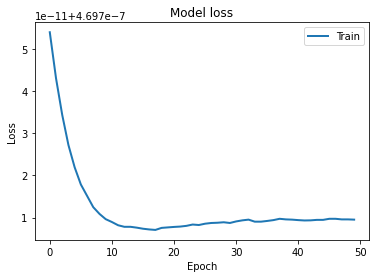

In [ ]:
plt.plot(history1['loss'], linewidth=2, label='Train')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
featuremode2 = Sequential()
featuremode2.add(Dense(feature_dim1[0], input_shape=(input_dim1,), weights=autoencoder1.layers[1].get_weights()))
featuremode2.add(Dense(feature_dim1[1], weights=autoencoder1.layers[2].get_weights()))
featuremode2.add(Dense(feature_dim1[2], weights=autoencoder1.layers[3].get_weights()))
featuremode2.add(Dense(feature_dim1[3], weights=autoencoder1.layers[4].get_weights()))

featuremode2.compile(optimizer='adadelta', loss='mse')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(featuremode2.predict(featuremodel.predict(train_set)), target)

y_pred = clf.predict(featuremode2.predict(featuremodel.predict(test_set)))

print('Accuracy: {:.2f}'.format(accuracy_score(test_target, y_pred)))

Accuracy: 0.76


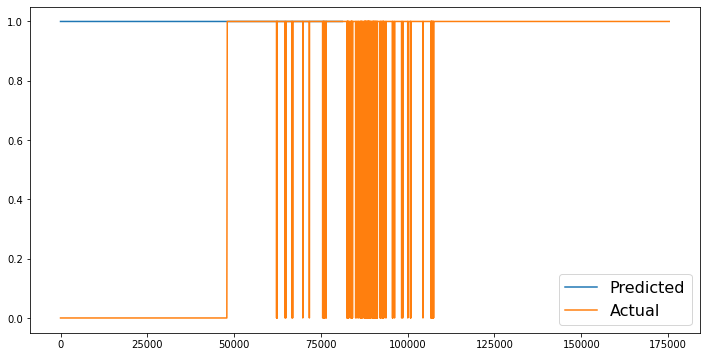

Mean Squared Error : 0.24007982949995688


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
plot1 = plt.figure(figsize=(12,6))
plt.plot(y_pred, label='Predicted')
plt.plot(test_target, label='Actual')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(test_target, y_pred))